In [21]:
#importing the necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [22]:
#load the image
image_path = "coins.jpg"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #convert image to grayscale

In [23]:
blurred = cv2.GaussianBlur(gray, (15, 15), 0) #Apply Gaussian Blur to reduce noise and smooth the image

In [24]:
#Apply Adaptive Thresholding to separate coins from the background
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                               cv2.THRESH_BINARY_INV, 11, 3)

In [25]:
#Find contours of the detected objects (coins)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [26]:
#Filter out small contours based on area threshold to remove noise
min_area = 5000 
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]
output = image.copy() #Draw the detected contours on the original image
cv2.drawContours(output, filtered_contours, -1, (0, 255, 0), 3)
output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB) #Convert the image from BGR to RGB for proper visualization in Matplotlib

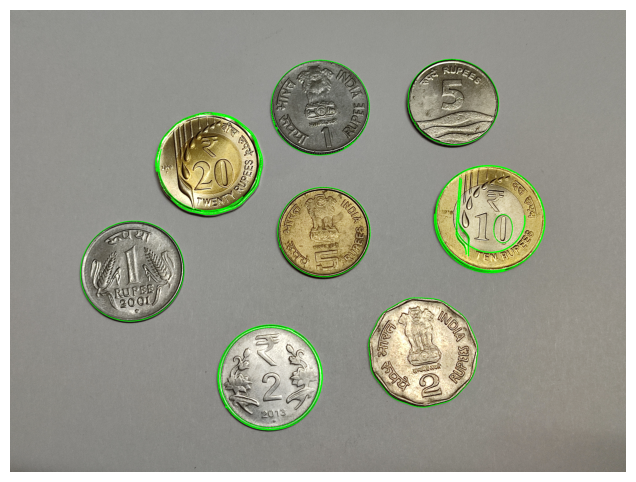

In [27]:
#Display the final output image with detected coins
plt.figure(figsize=(8, 6))
plt.imshow(output_rgb)
plt.axis("off")
plt.show()